## preamble

In [9]:
SetDirectory["~/Documents/Univ/StocForm_for_Gauge/num"];

In [10]:
SetOptions[{Plot,LogPlot,LogLinearPlot,LogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3]}];
SetOptions[{ListPlot,ListLogPlot,ListLogLinearPlot,ListLogLogPlot},
           {ImageSize->Large,
            Frame->True, 
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3],
            Joined->True}];
SetOptions[{ParametricPlot},
            {ImageSize->Large
            ,Frame->True
            ,LabelStyle->Directive[Black,Large,FontFamily->"Palatino"]
            ,PlotStyle->AbsoluteThickness[3]
            ,AspectRatio->1/GoldenRatio}];
SetOptions[{ParametricPlot3D},
           {ImageSize->Large
           ,LabelStyle->Directive[Black,Large,FontFamily->"Palatino"]
           ,PlotStyle->AbsoluteThickness[3]}];
RGBData = {"#5E81B5","#E19C24","#8FB032","#EB6235","#8778B3","#C56E1A","#5D9EC7","#FFBF00","#A5609D","#929600","#E95536","#6685D9","#F89F13","#BC5B80","#47B66D"};
Color = Map[RGBColor,RGBData];

## 3D simulation

2
W         -(W Wp)

            2
-(W Wp)   Wp
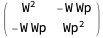

In [7]:
Mmatrix = {{W^2,-W Wp},{-W Wp,Wp^2}}; Mmatrix // MatrixForm

Wp                  W
--------------      --------------
      2     2             2     2
Sqrt[W  + Wp ]      Sqrt[W  + Wp ]

        W                 Wp
-(--------------)   --------------
        2     2           2     2
  Sqrt[W  + Wp ]    Sqrt[W  + Wp ]
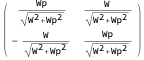

In [8]:
Rmatrix = 1/Sqrt[W^2+Wp^2] DiagonalMatrix[{W,Wp}].Eigenvectors[Mmatrix]; Rmatrix // MatrixForm

In [9]:
Rmatrix.Mmatrix.Transpose[Rmatrix] // Simplify

2     2
{{0, 0}, {0, W  + Wp }}

In [10]:
Rmatrix = 1/Sqrt[W^2+Wp^2] {{Wp,W},{-W,Wp}};
Rmatrix.Mmatrix.Transpose[Rmatrix] // Simplify

2     2
{{0, 0}, {0, W  + Wp }}

In [16]:
WW[x_,kp_] = WhittakerW[-I x,1/2,-2I kp];
Wp[x_,kp_] = D[WW[x,kp],kp] // Simplify;

In [14]:
Arg[I]

Pi
--
2

-Graphics-
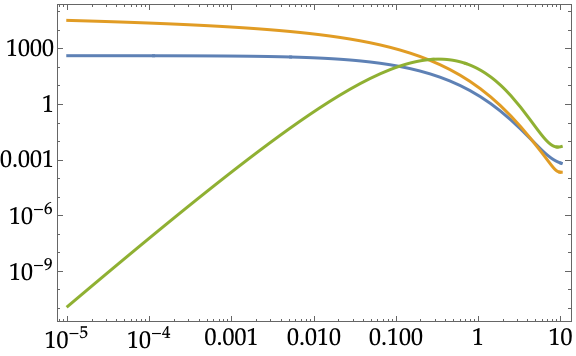

In [15]:
LogLogPlot[{Abs[WW[5,kp]],Abs[Wp[5,kp]],kp^4(Abs[WW[5,kp]]^2+Abs[Wp[5,kp]]^2)},{kp,10^-5,10}]

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[1.6], Dashing[{Small, Small}]]}, {W, W'}, 
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.2, 0.2}, Identity]]
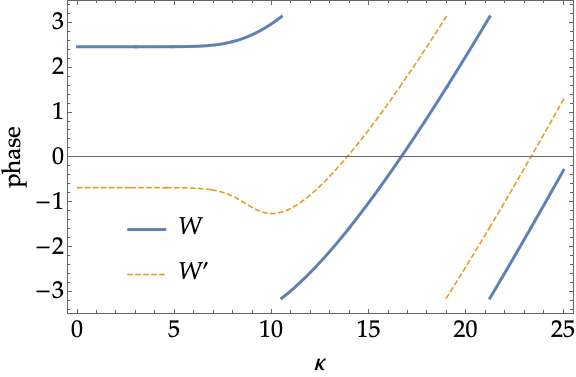

In [179]:
FigPhase =
Plot[{Arg[WW[5,kp]],Arg[Wp[5,kp]]}, {kp,0,25}, PlotRange->Full ,FrameLabel->{\[Kappa],"phase"} ,PlotLegends->Placed[{W,W'} ,{0.2,0.2}]
    ,PlotStyle->{AbsoluteThickness[3],Dashed}]

In [180]:
Export["Whittaker_phase.pdf" ,FigPhase];

In [18]:
RR[x_,kp_] = 1/Sqrt[Abs[WW[x,kp]]^2+Abs[Wp[x,kp]]^2] {{Abs[Wp[x,kp]],Abs[WW[x,kp]]},{-Abs[WW[x,kp]],Abs[Wp[x,kp]]}};
RT[x_,kp_] = Transpose[RR[x,kp]];

0.997818     -0.0660282

0.0660282    0.997818
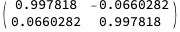

In [20]:
RT[5,0.02] // MatrixForm

In [21]:
RR[x,kp].RT[x,kp] // Simplify

{{1, 0}, {0, 1}}

In [22]:
Amp[H_,x_,kp_] = kp^2 H^2 / Sqrt[3] / (2\[Pi]) Exp[\[Pi] x/2] Sqrt[Abs[WW[x,kp]]^2+Abs[Wp[x,kp]]^2];

In [23]:
Hubble = 10^-5;
xi = 5;
kappa = 0.02;

In [26]:
proc = ItoProcess[{\[DifferentialD]Bx[t] + 2 Bx[t]\[DifferentialD]t == 
                        RT[xi,kappa][[1,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wx[t],
                   \[DifferentialD]By[t] + 2 By[t]\[DifferentialD]t == 
                        RT[xi,kappa][[1,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wy[t],
                   \[DifferentialD]Bz[t] + 2 Bz[t]\[DifferentialD]t == 
                        RT[xi,kappa][[1,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wz[t],
                   \[DifferentialD]Ex[t] + 2 Ex[t]\[DifferentialD]t - 2xi Bx[t]\[DifferentialD]t == 
                        RT[xi,kappa][[2,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wx[t],
                   \[DifferentialD]Ey[t] + 2 Ey[t]\[DifferentialD]t - 2xi By[t]\[DifferentialD]t == 
                        RT[xi,kappa][[2,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wy[t],
                   \[DifferentialD]Ez[t] + 2 Ez[t]\[DifferentialD]t - 2xi Bz[t]\[DifferentialD]t == 
                        RT[xi,kappa][[2,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wz[t]}, 
                   {Bx[t],By[t],Bz[t],Ex[t],Ey[t],Ez[t]}, {{Bx,By,Bz,Ex,Ey,Ez},{0,0,0,0,0,0}}, t, 
                   {wx\[Distributed]WienerProcess[], wy\[Distributed]WienerProcess[], 
                       wz\[Distributed]WienerProcess[]}];

In [27]:
Nf = 20;

In [28]:
sol = RandomFunction[proc, {0,Nf,0.01}];

In [29]:
Bsol[t_] = {sol["PathComponent",1]["PathFunction"][t], 
            sol["PathComponent",2]["PathFunction"][t],
            sol["PathComponent",3]["PathFunction"][t]};
Esol[t_] = {sol["PathComponent",4]["PathFunction"][t], 
            sol["PathComponent",5]["PathFunction"][t],
            sol["PathComponent",6]["PathFunction"][t]};

In [31]:
BAmp[t_] = Norm[Bsol[t]]^2;
NormB[t_] = Bsol[t] / Norm[Bsol[t]];
EAmp[t_] = Norm[Esol[t]]^2;
NormE[t_] = Esol[t] / Norm[Esol[t]];

In [35]:
PBB[H_,x_,kp_] = kp^4 H^4 / (4\[Pi]^2) Exp[\[Pi] x] Abs[WW[x,kp]]^2;
PEE[H_,x_,kp_] = kp^4 H^4 / (4\[Pi]^2) Exp[\[Pi] x] Abs[Wp[x,kp]]^2;
PBE[H_,x_,kp_] = kp^4 H^4 / (4\[Pi]^2) Exp[\[Pi] x] WW[x,kp] Conjugate[Wp[x,kp]];
PEB[H_,x_,kp_] = kp^4 H^4 / (4\[Pi]^2) Exp[\[Pi] x] Conjugate[WW[x,kp]] Wp[x,kp];
BvarEx[H_,x_,kp_] = 1/4 PBB[H,x,kp];
EvarEx[H_,x_,kp_] = 1/4 PEE[H,x,kp] + x/8 (PBE[H,x,kp]+PEB[H,x,kp]) + x^2/8 PBB[H,x,kp];

In [41]:
1/4 PBE[Hubble,xi,kappa] + xi/8 PBB[Hubble,xi,kappa]

-17             -29
-7.51795 10    - 1.00263 10    I

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
                                                          ~2  ~2
>       AbsoluteThickness[2], Dashing[{Small, Small}]]}, {B , E }, 
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Row, 
 
>     LegendMarkerSize -> 20], {0.4, 0.15}, Identity]]
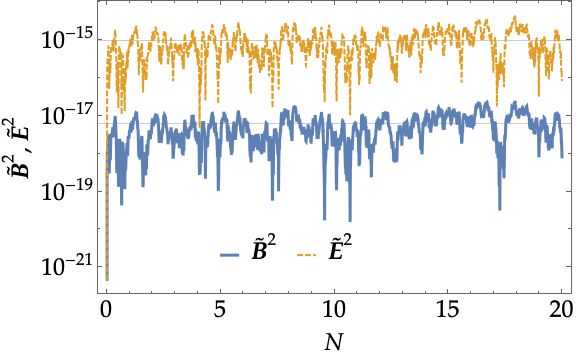

In [42]:
FigBAmpEAmp = 
    LogPlot[{BAmp[t],EAmp[t]},{t,0,Nf}, GridLines->{None,{BvarEx[Hubble,xi,kappa],Abs[EvarEx[Hubble,xi,kappa]]}},
            PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dashed}}, 
            FrameLabel->{N,Row[{OverTilde[Style[B,Bold]]^2, ", ", OverTilde[Style["E",Italic,Bold]]^2}]},
            PlotLegends->Placed[LineLegend[{OverTilde[Style[B,Bold]]^2, OverTilde[Style["E",Italic,Bold]]^2}, 
                                        LegendMarkerSize->20, LegendLayout->"Row"], {0.4,0.15}]]

In [43]:
Export["BAmpEAmp.pdf", FigBAmpEAmp];

Legended[-Graphics3D-, Placed[LineLegend[{Directive[RGBColor[0.368417, 0.506779, 
 
>        0.709798], AbsoluteThickness[3]], 
 
                                                                                  ^  ^
                                                                                  ~  ~
>      Directive[RGBColor[0.880722, 0.611041, 0.142051], AbsoluteThickness[3]]}, {B, E}, 
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.1, 0.1}, Identity]]
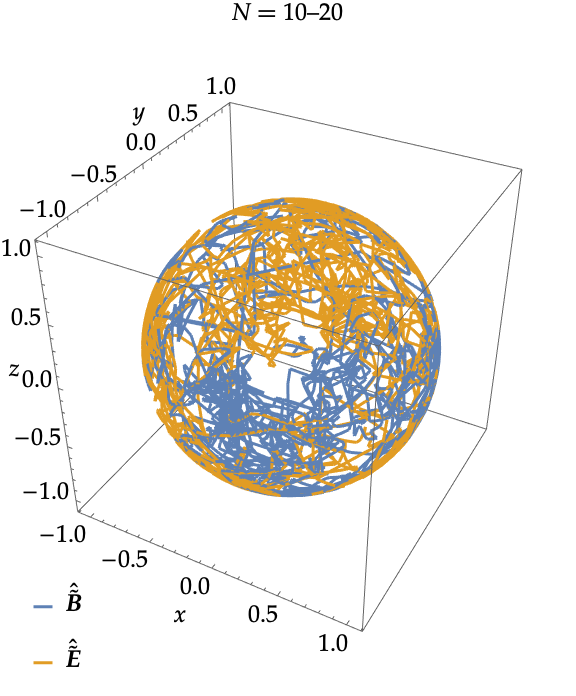

In [44]:
FigNormBNormE = 
ParametricPlot3D[{NormB[t],NormE[t]},{t,10,Nf}, AxesLabel->{x,y,z}, 
    PlotLegends->Placed[{OverHat[OverTilde[Style[B,Bold]]], OverHat[OverTilde[Style["E",Italic,Bold]]]}, {0.1,0.1}]
    ,PlotLabel->Style[Row[{N==10 ,"\[Dash]" ,20}],Black,Large,FontFamily->"Palatino"]
    (*,PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dashed}}*)]

In [45]:
Export["NormBNormE.pdf", FigNormBNormE];

-Graphics-
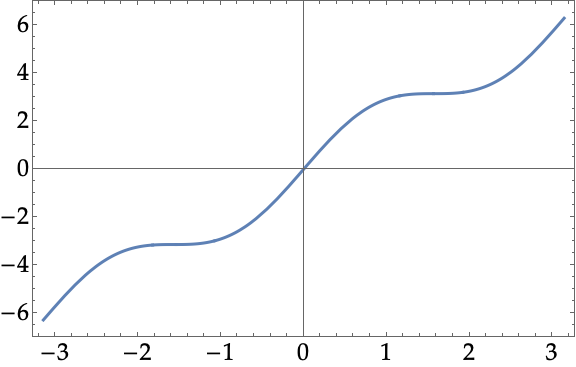

In [45]:
Plot[Sin[2x]+2x,{x,-\[Pi],\[Pi]}]

In [46]:
MolTheta[phi_] := theta /. FindRoot[\[Pi] Sin[phi] == Sin[2theta]+2theta, {theta,0}]
MolPoint[lambda_,phi_] := {lambda Cos[MolTheta[phi]], \[Pi]/2 Sin[MolTheta[phi]]}

In [48]:
lambdaB[t_] = Sign[Bsol[t][[2]]]ArcCos[Bsol[t][[1]]/Sqrt[Bsol[t][[1]]^2 + Bsol[t][[2]]^2]];
phiB[t_] = ArcSin[NormB[t][[3]]];
(*thetaB[t_] := theta /. FindRoot[\[Pi] Sin[phiB[t]] == Sin[2theta]+2theta, {theta,0}]*)
MolB[t_] := MolPoint[lambdaB[t],phiB[t]] 
(*{lambdaB[t]Cos[thetaB[t]], \[Pi]/2 Sin[thetaB[t]]}*)
lambdaE[t_] = Sign[Esol[t][[2]]]ArcCos[Esol[t][[1]]/Sqrt[Esol[t][[1]]^2 + Esol[t][[2]]^2]];
phiE[t_] = ArcSin[NormE[t][[3]]];
(*thetaE[t_] := theta /. FindRoot[\[Pi] Sin[phiE[t]] == Sin[2theta]+2theta, {theta,0}]*)
MolE[t_] := MolPoint[lambdaE[t],phiE[t]] 
(*{lambdaE[t]Cos[thetaE[t]], \[Pi]/2 Sin[thetaE[t]]}*)

In [58]:
MolLongList = Table[MolPoint[lambda,phi] ,{lambda,-\[Pi],\[Pi],\[Pi]/18} ,{phi,-\[Pi]/2,\[Pi]/2,\[Pi]/180}]; // AbsoluteTiming
MolLatList = Table[MolPoint[lambda,phi] ,{phi,-\[Pi]/2,\[Pi]/2,\[Pi]/18} ,{lambda,-\[Pi],\[Pi],\[Pi]/180}]; // AbsoluteTiming
MolFrameList = {Table[MolPoint[-\[Pi],phi] ,{phi,-\[Pi]/2,\[Pi]/2,\[Pi]/180}] ,Table[MolPoint[\[Pi],phi] ,{phi,-\[Pi]/2,\[Pi]/2,\[Pi]/180}]};

{6.10084, Null}
{7.20335, Null}

Legended[-Graphics-, Placed[LineLegend[{Directive[EdgeForm[None], Opacity[1.], 
 
>       FaceForm[Opacity[0.3]], RGBColor[0.368417, 0.506779, 0.709798], 
 
>       AbsoluteThickness[3]], Directive[EdgeForm[None], Opacity[1.], 
 
>       FaceForm[Opacity[0.3]], RGBColor[0.880722, 0.611041, 0.142051], 
 
                                                          ^  ^
                                                          ~  ~
>       AbsoluteThickness[2], Dashing[{Small, Small}]]}, {B, E}, LegendMarkers -> None, 
 
>     LabelStyle -> Directive[GrayLevel[0], FontSize -> 20, FontFamily -> Palatino], 
 
>     LegendFunction -> (Framed[#1, RoundingRadius -> 4, Background -> White] & ), 
 
>     LegendLayout -> Column, LegendMarkerSize -> 20], {0.1, 0.2}, Identity]]
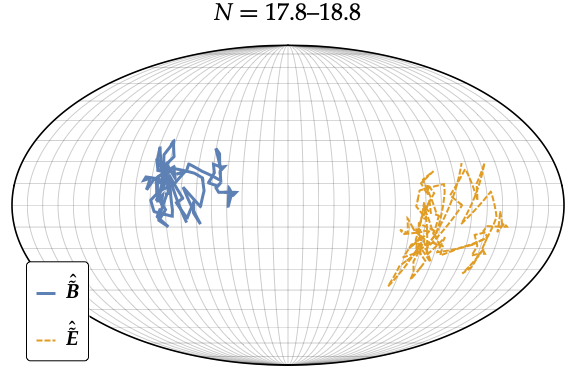

In [125]:
Nplot = 17.8;
FigMollweide = 
Show[ListPlot[MolLongList ,PlotStyle->{{Thin,Black}} ,Frame->False ,Axes->False]
    ,ListPlot[MolLatList ,PlotStyle->{{Thin,Black}}]
    ,ListPlot[MolFrameList ,PlotStyle->{Black}]
    ,ParametricPlot[{MolB[t],MolE[t]},{t,Nplot,Nplot+1} ,PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dashed}}
        ,PlotLegends->Placed[LineLegend[{OverHat[OverTilde[Style[B,Bold]]],OverHat[OverTilde[Style["E",Italic,Bold]]]}
                                ,LegendMarkerSize->20 ,LabelStyle->Directive[Black,FontSize->20,FontFamily->"Palatino"]
                                ,LegendFunction->(Framed[#,RoundingRadius->4,Background->White]&)], {0.1,0.2}]]
    ,PlotLabel->Style[Row[{N== Nplot ,"\[Dash]" ,Nplot+1}],Black,Large,FontFamily->"Palatino"] ,LabelStyle->Directive[Black]]

In [127]:
Export["Mollweide.pdf", FigMollweide];

In [128]:
MollweideFig[t_] :=
Show[ListPlot[MolLongList ,PlotStyle->{{Thin,Black}} ,Frame->False ,Axes->False]
    ,ListPlot[MolLatList ,PlotStyle->{{Thin,Black}}]
    ,ListPlot[MolFrameList ,PlotStyle->{Black}]
    ,ListPlot[{{MolB[t]},{MolE[t]}} ,Joined->False ,PlotMarkers->{Automatic,Medium}
        ,PlotLegends->Placed[PointLegend[{OverHat[OverTilde[Style[B,Bold]]],OverHat[OverTilde[Style["E",Italic,Bold]]]}
                                        ,LabelStyle->Directive[Black,FontSize->20,FontFamily->"Palatino"]
                                        ,LegendFunction->(Framed[#,RoundingRadius->4,Background->White]&)], {0.1,0.2}] ]
    ,PlotLabel->Style[N==t,Black,Large,FontFamily->"Palatino"] ,LabelStyle->Directive[Black] ]

Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.0128333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[PointSize[0.0128333], RGBColor[0.880722, 0.611041, 0.142051], 
 
                                 ^  ^
                                 ~  ~
>       AbsoluteThickness[3]]}, {B, E}, 
 
>     LegendMarkers -> {{-Graphics-, Offset[10]}, {-Graphics-, Offset[10]}}, 
 
>     Joined -> {False, False}, LabelStyle -> 
 
>      Directive[GrayLevel[0], FontSize -> 20, FontFamily -> Palatino], 
 
>     LegendFunction -> (Framed[#1, RoundingRadius -> 4, Background -> White] & ), 
 
>     LegendLayout -> Column], {0.1, 0.2}, Identity]]
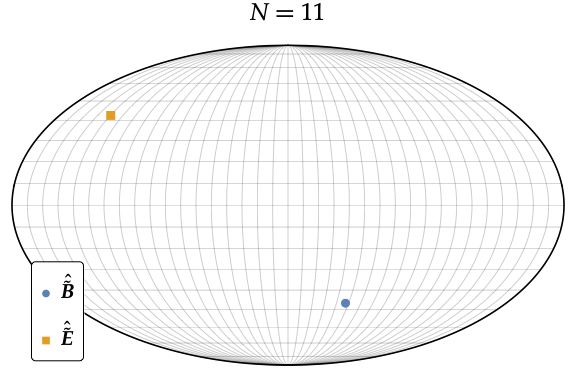

In [129]:
MollweideFig[11]

In [130]:
MollweideList = Table[MollweideFig[t] ,{t,16,18,0.01}]; // AbsoluteTiming

{111.048, Null}

In [131]:
Export["Mollweide.gif",MollweideList]; // AbsoluteTiming

AbsolluteTiming[Null]

-Graphics-
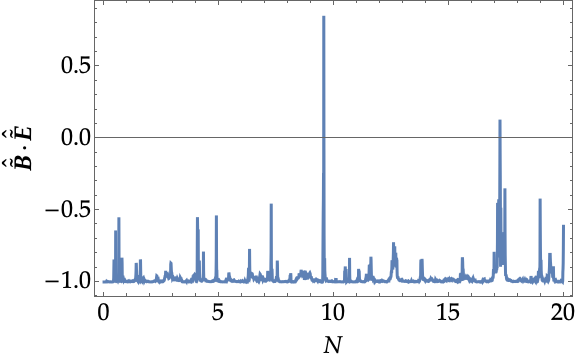

In [132]:
FigCorr = Plot[NormB[t].NormE[t],{t,0,Nf}, PlotRange->Full, 
            FrameLabel->{N,OverHat[OverTilde[Style[B,Bold]]]\[CenterDot]OverHat[OverTilde[Style["E",Italic,Bold]]]}]

In [133]:
Export["Correlation.pdf", FigCorr];